In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#!pip install datatable > /dev/null
import datatable as dt
import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jane-street-market-prediction/example_sample_submission.csv
/kaggle/input/jane-street-market-prediction/features.csv
/kaggle/input/jane-street-market-prediction/example_test.csv
/kaggle/input/jane-street-market-prediction/train.csv
/kaggle/input/jane-street-market-prediction/janestreet/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jane-street-market-prediction/janestreet/__init__.py


In [3]:

data = dt.fread('../input/jane-street-market-prediction/train.csv').to_pandas()

##transform resp to action
data['action']=(data['resp']>0).astype('int')
action = data['action']
weight = data['weight']
date = data['date']
resp = data['resp']

##grouping features(this step is from  's work)
grouplists=[['feature_7','feature_9','feature_11','feature_13','feature_15'],['feature_8','feature_10','feature_12','feature_14','feature_16'],
            ['feature_17','feature_19','feature_21','feature_23','feature_25'],['feature_18','feature_20','feature_22','feature_24','feature_26'],
            ['feature_27','feature_29','feature_31','feature_33','feature_35'],['feature_28','feature_30','feature_32','feature_34','feature_36'],
            ['feature_55','feature_56','feature_57','feature_58','feature_59'],['feature_72','feature_73','feature_74','feature_75','feature_76'],
            ['feature_78','feature_79','feature_80','feature_81','feature_82'],['feature_84','feature_85','featubre_86','feature_87','feature_88'],
            ['feature_90','feature_91','feature_92','feature_93','feature_94'],['feature_96','feature_97','feature_98','feature_99','feature_100'],
            ['feature_102','feature_103','feature_104','feature_105','feature_106'],['feature_108','feature_109','feature_110','feature_111','feature_112'],
            ['feature_114','feature_115','feature_116','feature_117','feature_118'],['feature_120','feature_122','feature_124','feature_126','feature_128'],
            ['feature_121','feature_123','feature_125','feature_127','feature_129']]
resp_group=[]
for i,groups in enumerate(grouplists):
    resp_group.append(groups[4])


In [4]:
data

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,1
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1,0
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2,1
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3,0
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486,1
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487,0
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488,1
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489,0


In [5]:
means = data.mean()
data = data.fillna(means)

In [6]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##feature scaling
from sklearn import preprocessing


scaler=preprocessing.StandardScaler().fit(data[resp_group])
data=scaler.transform(data[resp_group])
data=pd.DataFrame(data)
data['date'] = date
data['weight'] = weight
data['resp'] = resp
data['action'] = action

##focus on data points of which weight is not 0
data.columns=['feature_15',
 'feature_16',
 'feature_25',
 'feature_26',
 'feature_35',
 'feature_36',
 'feature_59',
 'feature_76',
 'feature_82',
 'feature_88',
 'feature_94',
 'feature_100',
 'feature_106',
 'feature_112',
 'feature_118',
 'feature_128',
 'feature_129','date','weight', 'resp', 'action']


In [7]:
data

,feature_15,feature_16,feature_25,feature_26,feature_35,feature_36,feature_59,feature_76,feature_82,feature_88,...,feature_100,feature_106,feature_112,feature_118,feature_128,feature_129,date,weight,resp,action
0,-1.017317,-1.038812,0.633679,0.449440,-1.628772,-1.395010,0.195813,0.411771,1.696860,0.357772,...,-0.080882,1.352407,0.080948,2.635727,0.849417,6.346761,0,0.000000,0.006270,1
1,0.477461,0.423816,-0.482451,-0.404244,1.025736,0.913624,-0.187124,0.040256,0.041432,-0.206373,...,-0.253440,0.427991,-0.558583,0.516112,-0.714237,0.936736,0,16.673515,-0.009792,0
2,1.960524,1.285276,-0.831691,-0.591388,2.338922,1.628917,0.021654,-0.175910,-0.200262,0.161260,...,0.200082,0.623516,0.147618,0.602604,2.729894,5.202943,0,0.000000,0.023970,1
3,1.583401,1.197908,-0.988596,-0.825137,2.178480,1.715561,0.003591,1.232218,0.610181,1.186728,...,-0.748284,-0.818112,0.607731,-0.120454,1.523640,0.435115,0,0.000000,-0.003200,0
4,0.368374,0.190178,1.175032,0.985232,-1.067501,-0.908509,-0.132016,0.201849,0.887935,-0.125146,...,-0.406418,0.062267,-0.625119,0.735956,0.008705,2.085904,0,0.138531,-0.002604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,-0.436727,-0.126681,0.145413,0.451816,-0.344247,-0.485579,-0.191386,-0.289280,-1.040368,-0.469170,...,-0.044387,1.083444,-0.464565,0.636772,-0.968956,0.371714,499,0.000000,0.015396,1
2390487,-0.904200,-0.905810,0.322993,0.915860,-2.295567,-3.430554,5.743832,0.024996,0.025032,0.512888,...,0.378091,-0.115712,0.503807,-0.224454,0.132639,1.033099,499,0.000000,-0.004718,0
2390488,-0.540414,-0.658831,0.237477,0.172367,-0.251345,-0.238893,-0.135596,-0.485124,-0.402273,-0.014256,...,0.365519,0.413417,0.190688,0.157490,-0.727908,-1.733916,499,0.000000,0.016591,1
2390489,-1.270506,-1.467184,-1.282780,-1.673685,-0.130964,-0.123107,-0.146648,-0.466347,-2.144160,0.088549,...,0.406226,3.605900,0.277484,3.428914,-1.096329,0.216372,499,0.283405,-0.002004,0


In [8]:
train = data[data.date < 450]
test = data[data.date >= 450]

X_train = train.drop(['action', 'resp'], axis = 1)
X_test = test.drop(['action', 'resp'], axis = 1)
resp_train = train.resp
resp_test = test.resp

y_train = train.action
y_test = test.action


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [10]:
prediction = lda.predict(X_test)
# sum(lda.predict(X_test))/len(lda.predict(X_test))

max return is 4.4163461567812
min return is -3.2134658853404767


252.13256452948465

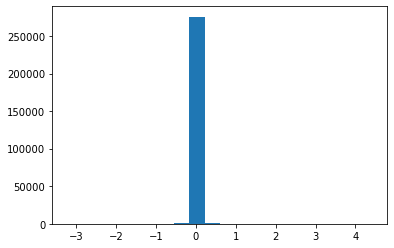

In [11]:
profit = X_test['weight']*prediction*resp_test
plt.hist(profit, bins = 20)
profit
print('max return is', max(profit))
print('min return is', min(profit))
np.sum(profit)

In [12]:
#backtest on the entire dataset
backtest = lda.predict(data.drop(['action', 'resp'], axis = 1))

In [13]:
np.savetxt("/kaggle/working/NhatPham_backtest.csv", backtest, delimiter=",")

In [14]:
np.savetxt("/kaggle/working/NhatPham_validation.csv", prediction, delimiter=",")